<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Modelo_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering coorporativo para manejo de relaciones**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 31 de diciembre del 2023
*   Fechad de actualización: 25 de enero del 2024
*   Descripción: El presente Script tiene como objetivo crear un modelo de clusterización para poder tener una clara gestion de las relaciones.


### Conexion con la el Datawarehouse

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Mounted at /content/drive


### Seleccion e instalacion de bibliotecas y librerias necesarias para el trabajo

In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos
import numpy as np #importo la libreria numpy manipular y molderar los datos
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as stats

### Conexion para subir las bases de datos seleccionadas.

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Msc. Bussines Inteligence & Data Analysis/Proyecto de Titulacion/Bases/Base_final.xlsx')

### Tratamiento y exploracion de las bases

In [ ]:
df1.columns= df1.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [ ]:
# Cambio los espacios y caracteres especiales de los nombres de las columnas de todos los dataframes

df1.columns = df1.columns.str.replace(' ', '_')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   unnamed:_0                        1907 non-null   int64         
 1   organization_name                 1907 non-null   object        
 2   primary_contact                   1907 non-null   object        
 3   contact:_employer(count)          1907 non-null   int64         
 4   email                             1907 non-null   object        
 5   phone                             1907 non-null   object        
 6   created                           1907 non-null   datetime64[ns]
 7   matches                           1907 non-null   object        
 8   matched_name                      1907 non-null   object        
 9   similarity_score                  1907 non-null   float64       
 10  match_index                       1907 non-null 

In [ ]:
df1.columns.to_list()

['unnamed:_0',
 'organization_name',
 'primary_contact',
 'contact:_employer(count)',
 'email',
 'phone',
 'created',
 'matches',
 'matched_name',
 'similarity_score',
 'match_index',
 'no._fila',
 'expediente_x',
 'ruc',
 'nombre_x',
 'situación_legal',
 'fecha_constitucion',
 'tipo',
 'país',
 'región',
 'provincia_x',
 'cantón',
 'ciudad_x',
 'calle',
 'número',
 'intersección',
 'teléfono',
 'representante',
 'cargo',
 'capital_suscrito',
 'ciiu_nivel_1',
 'ciiu_nivel_6',
 'posición',
 'año',
 'pocisión_',
 'año.1',
 'expediente_y',
 'nombre_y',
 'tipo_compañía',
 'actividad_económica',
 'región_',
 'provincia_y',
 'ciudad_y',
 'tamaño',
 'sector',
 'cant._empleados',
 'activio_2022',
 'patrimonio_2022',
 'ingreso_por_ventas_2022',
 'utilidad_antes_del_impuesto_2022',
 'utilidad_del_ejercicio_2022',
 'utilidad_neta_2022',
 'ir_causado_2022',
 'ingreso_total_2022',
 'adjusted_activio_2022',
 'log_adjusted_activio_2022',
 'adjusted_cant._empleados',
 'log_adjusted_cant._empleados']

In [ ]:
df1 = df1.drop(['adjusted_activio_2022',
 'log_adjusted_activio_2022',
 'adjusted_cant._empleados',
 'log_adjusted_cant._empleados', 'región_',
 'provincia_y',
 'ciudad_y','expediente_y',
 'nombre_y','provincia_x',
 'cantón',
 'ciudad_x',
 'calle',
 'número',
 'intersección',
 'teléfono','nombre_x',
 'situación_legal','unnamed:_0',
 'organization_name',
 'primary_contact','email',
 'phone', 'created',
 'matches',
 'matched_name',
 'similarity_score',
 'match_index',
 'no._fila',
 'expediente_x',], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   contact:_employer(count)          1907 non-null   int64  
 1   ruc                               1907 non-null   int64  
 2   fecha_constitucion                1907 non-null   object 
 3   tipo                              1907 non-null   object 
 4   país                              1907 non-null   object 
 5   región                            1907 non-null   object 
 6   representante                     1907 non-null   object 
 7   cargo                             1907 non-null   object 
 8   capital_suscrito                  1907 non-null   object 
 9   ciiu_nivel_1                      1907 non-null   object 
 10  ciiu_nivel_6                      1907 non-null   object 
 11  posición                          1907 non-null   int64  
 12  año   

In [ ]:
df1 = df1.drop(['ciiu_nivel_6',], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   contact:_employer(count)          1907 non-null   int64  
 1   ruc                               1907 non-null   int64  
 2   fecha_constitucion                1907 non-null   object 
 3   tipo                              1907 non-null   object 
 4   país                              1907 non-null   object 
 5   región                            1907 non-null   object 
 6   representante                     1907 non-null   object 
 7   cargo                             1907 non-null   object 
 8   capital_suscrito                  1907 non-null   object 
 9   ciiu_nivel_1                      1907 non-null   object 
 10  ciiu_nivel_6                      1907 non-null   object 
 11  posición                          1907 non-null   int64  
 12  año   

In [ ]:
df1 = df1.drop(["tipo"], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   contact:_employer(count)          1907 non-null   int64  
 1   ruc                               1907 non-null   int64  
 2   fecha_constitucion                1907 non-null   object 
 3   país                              1907 non-null   object 
 4   región                            1907 non-null   object 
 5   representante                     1907 non-null   object 
 6   cargo                             1907 non-null   object 
 7   capital_suscrito                  1907 non-null   object 
 8   ciiu_nivel_1                      1907 non-null   object 
 9   ciiu_nivel_6                      1907 non-null   object 
 10  posición                          1907 non-null   int64  
 11  año                               1907 non-null   int64  
 12  pocisi

In [ ]:
# en el siguiente codigo creare un codigo que me permita calcular el ratio de valores perdidos para cada columna.
mv = df1.isnull().sum() # creo una variable que realice la suma de cada missing values de las columnas del data frame
td = len(df1) #creo una variable que cuente la longitud de los datos totales de mi data frame
mvrt = round(((mv/td)*100),2) #creo el ratio que itera cada columna del data frame y lo divide para el total de observaciones
#se multiplica porcien para obtener un valor en porcentaje y se lo redonde a 2 decimales
mvrt #este ratio muestra cual es el porcentaje de datos perdidos

contact:_employer(count)            0.0
ruc                                 0.0
fecha_constitucion                  0.0
país                                0.0
región                              0.0
representante                       0.0
cargo                               0.0
capital_suscrito                    0.0
ciiu_nivel_1                        0.0
ciiu_nivel_6                        0.0
posición                            0.0
año                                 0.0
pocisión_                           0.0
año.1                               0.0
tipo_compañía                       0.0
actividad_económica                 0.0
tamaño                              0.0
sector                              0.0
cant._empleados                     0.0
activio_2022                        0.0
patrimonio_2022                     0.0
ingreso_por_ventas_2022             0.0
utilidad_antes_del_impuesto_2022    0.0
utilidad_del_ejercicio_2022         0.0
utilidad_neta_2022                  0.0


In [ ]:
# Convertir 'fecha_constitucion' a datetime si aún no lo es
if not pd.api.types.is_datetime64_any_dtype(df1['fecha_constitucion']):
    df1['fecha_constitucion'] = pd.to_datetime(df1['fecha_constitucion'], errors='coerce')

# Para 'año' y 'año.1', si son representaciones de año, asegúrate de que sean enteros
# Si son fechas completas, puedes convertirlas a datetime como hicimos antes
df1['año'] = pd.to_numeric(df1['año'], errors='coerce').astype('Int64')
df1['año.1'] = pd.to_numeric(df1['año.1'], errors='coerce').astype('Int64')

# Extracción de características de 'fecha_constitucion'
df1['año_constitucion'] = df1['fecha_constitucion'].dt.year
df1['mes_constitucion'] = df1['fecha_constitucion'].dt.month
df1['dia_constitucion'] = df1['fecha_constitucion'].dt.day

<ipython-input-14-d434fba1e6ce>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['fecha_constitucion'] = pd.to_datetime(df1['fecha_constitucion'], errors='coerce')


In [ ]:
df1.columns.tolist()

['contact:_employer(count)',
 'ruc',
 'fecha_constitucion',
 'país',
 'región',
 'representante',
 'cargo',
 'capital_suscrito',
 'ciiu_nivel_1',
 'ciiu_nivel_6',
 'posición',
 'año',
 'pocisión_',
 'año.1',
 'tipo_compañía',
 'actividad_económica',
 'tamaño',
 'sector',
 'cant._empleados',
 'activio_2022',
 'patrimonio_2022',
 'ingreso_por_ventas_2022',
 'utilidad_antes_del_impuesto_2022',
 'utilidad_del_ejercicio_2022',
 'utilidad_neta_2022',
 'ir_causado_2022',
 'ingreso_total_2022',
 'año_constitucion',
 'mes_constitucion',
 'dia_constitucion']

In [ ]:
df1['cambio_posicion'] = 'Se mantuvo'  # Valor predeterminado

df1.loc[df1['posición'] < df1['pocisión_'], 'cambio_posicion'] = 'Subio'
df1.loc[df1['posición'] > df1['pocisión_'], 'cambio_posicion'] = 'Bajo'

### Analisis descriptivo

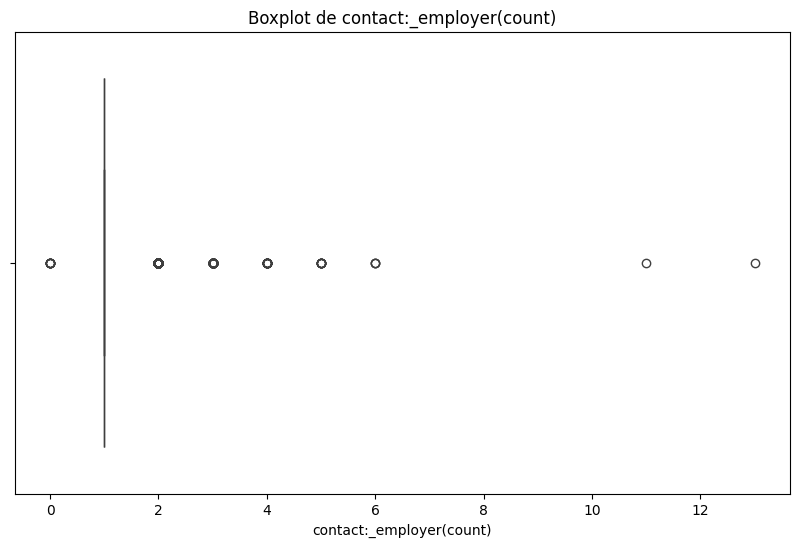

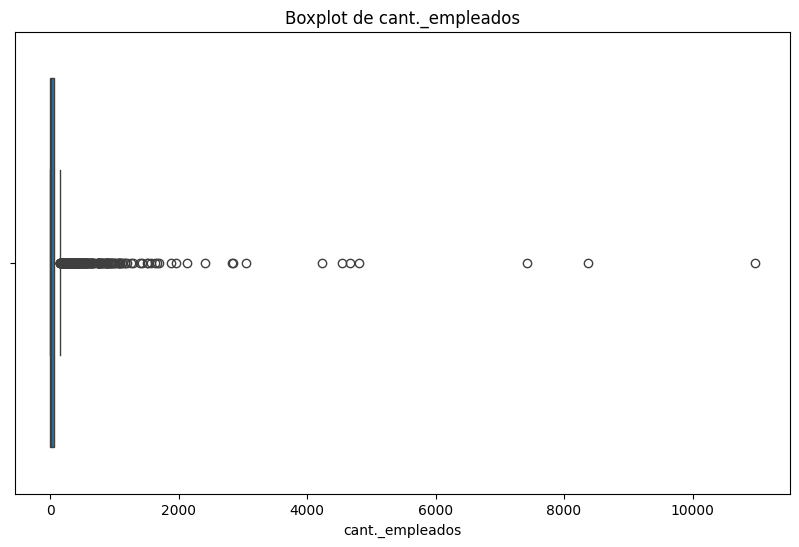

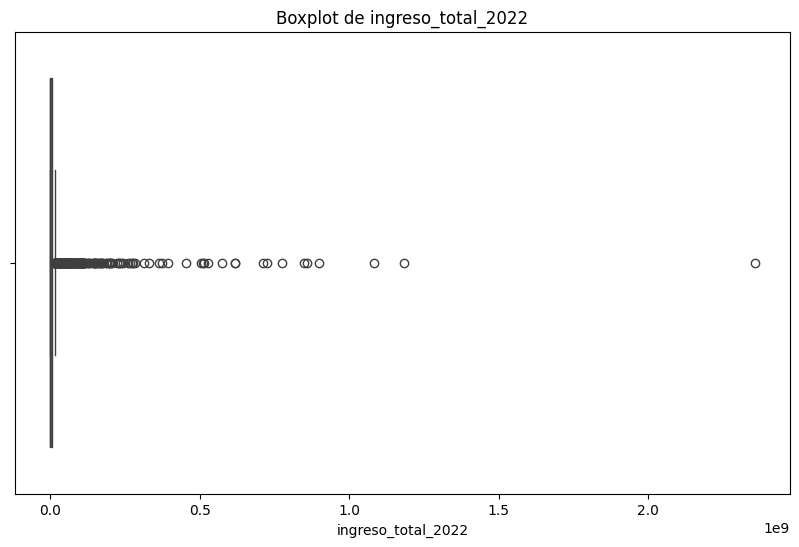

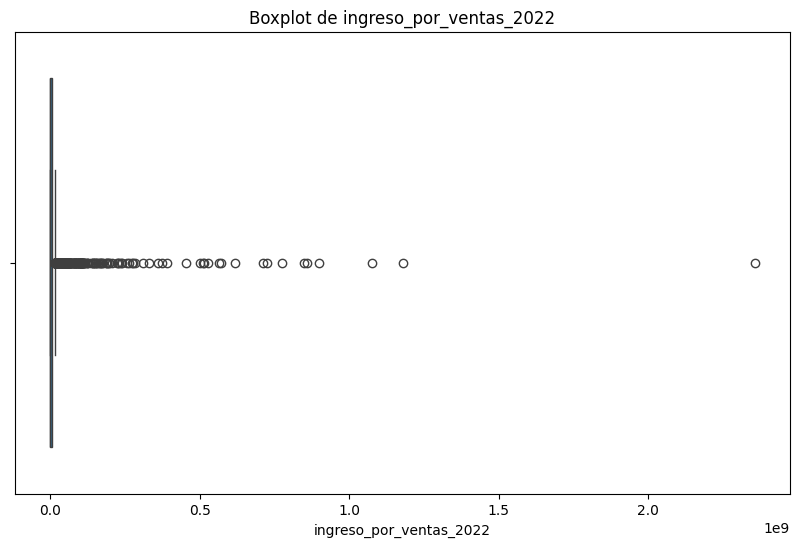

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['contact:_employer(count)', 'cant._empleados',
 'ingreso_total_2022',"ingreso_por_ventas_2022"]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [ ]:


# Suponiendo que df1 es tu DataFrame
numeric_columns = ['contact:_employer(count)', 'activio_2022', 'ir_causado_2022', 'cant._empleados']

# Definir una constante específica para cada columna
constantes = {
    'contact:_employer(count)': 1,  # Una constante pequeña para una variable en un rango menor
    'activio_2022': 500,  # Una constante mayor para una variable en un rango de cientos de miles
    'ir_causado_2022': 500,
    'cant._empleados':10,
    'ingreso_por_ventas_2022':500,

}

# Aplicar transformación logarítmica con ajuste específico
for col in numeric_columns:
    adjusted_col = df1[col] + constantes.get(col, 1)  # Usar la constante definida o 1 por defecto
    df1[f'log_{col}'] = np.log(adjusted_col)

# Esto creará nuevas columnas en df1 con los logaritmos de las columnas originales

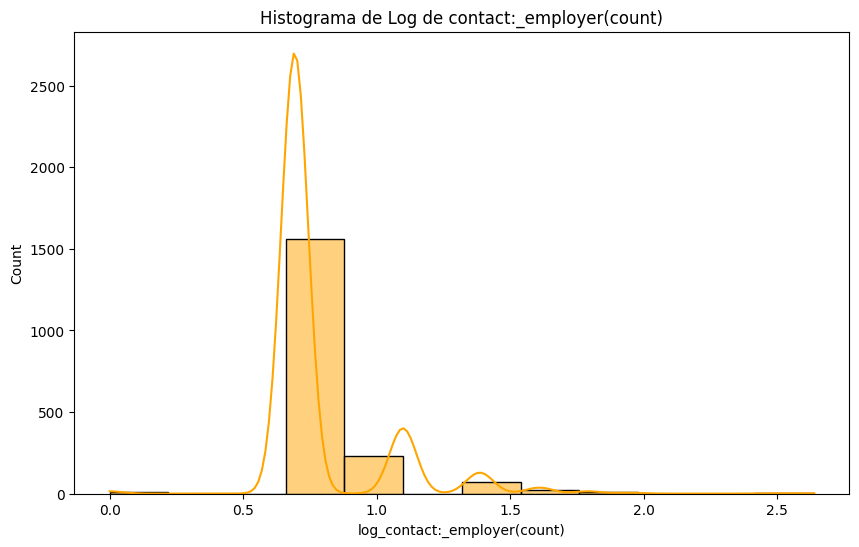

In [ ]:
if 'log_contact:_employer(count)' in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1['log_contact:_employer(count)'], kde=True, color='orange')
    plt.title('Histograma de Log de contact:_employer(count)')
    plt.show()


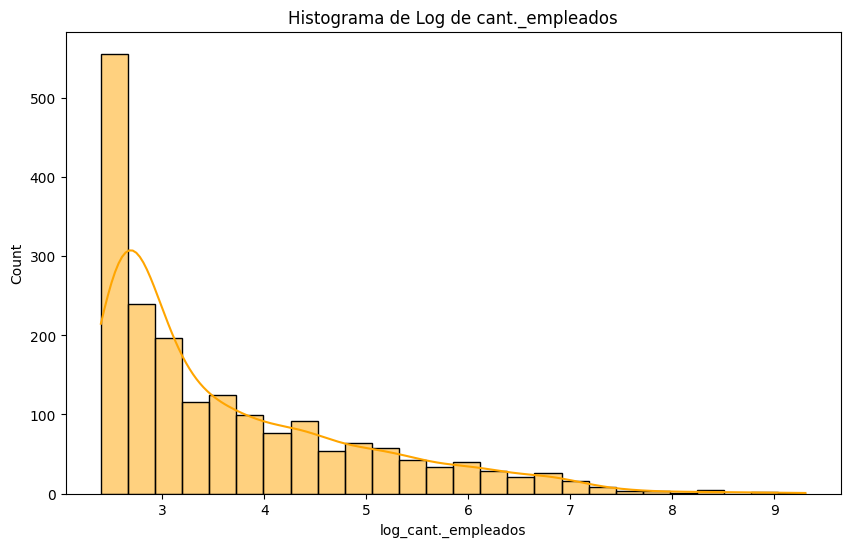

In [ ]:
if 'log_cant._empleados' in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1['log_cant._empleados'], kde=True, color='orange')
    plt.title('Histograma de Log de cant._empleados')
    plt.show()

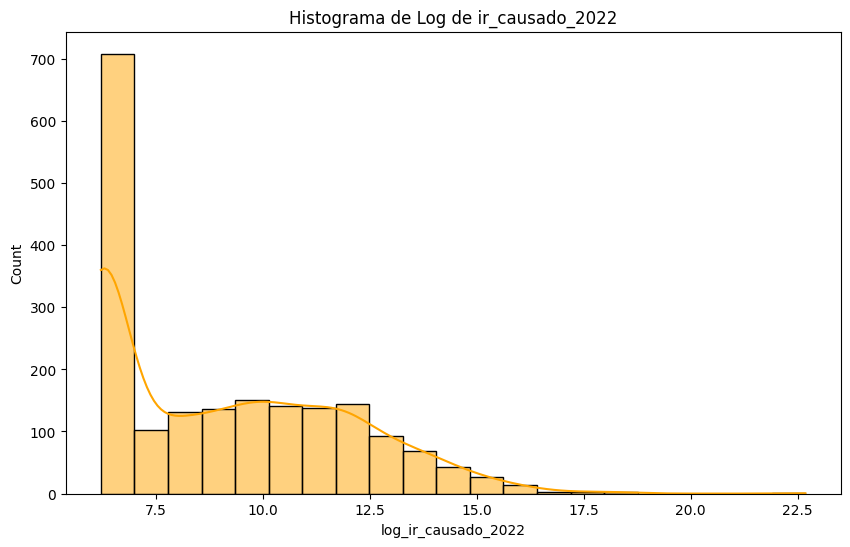

In [ ]:
if 'log_ir_causado_2022' in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1['log_ir_causado_2022'], kde=True, color='orange')
    plt.title('Histograma de Log de ir_causado_2022')
    plt.show()

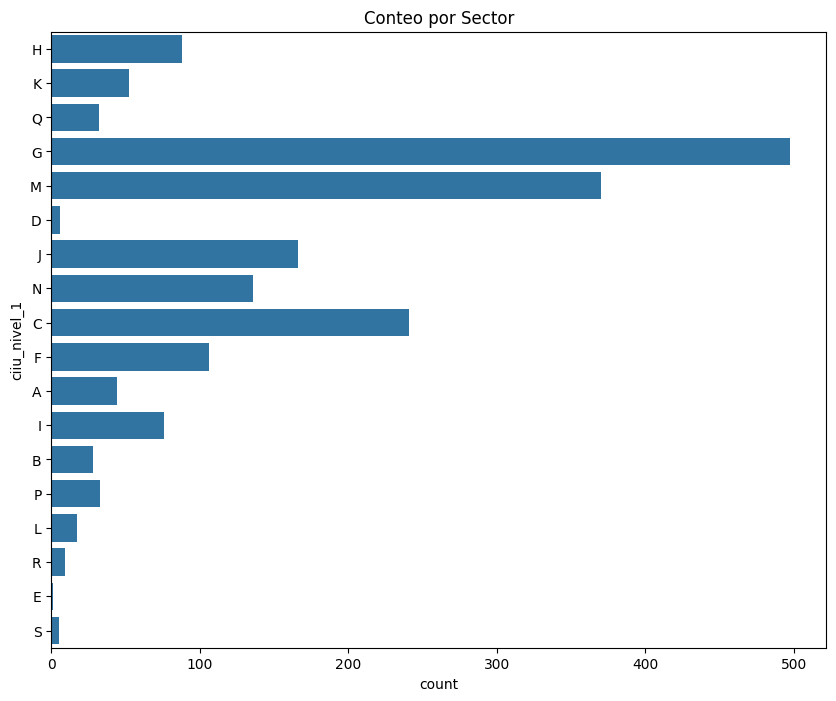

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(y='ciiu_nivel_1', data=df1)
plt.title('Conteo por Sector')
plt.show()

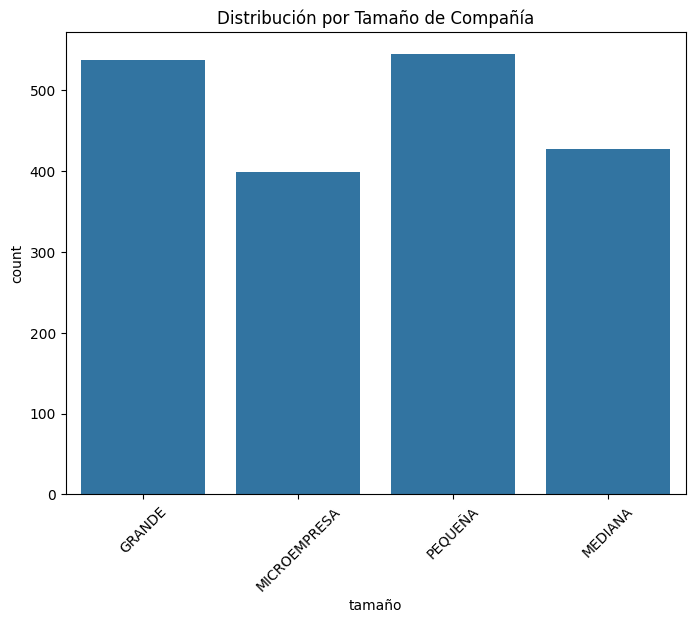

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='tamaño', data=df1)
plt.title('Distribución por Tamaño de Compañía')
plt.xticks(rotation=45)
plt.show()

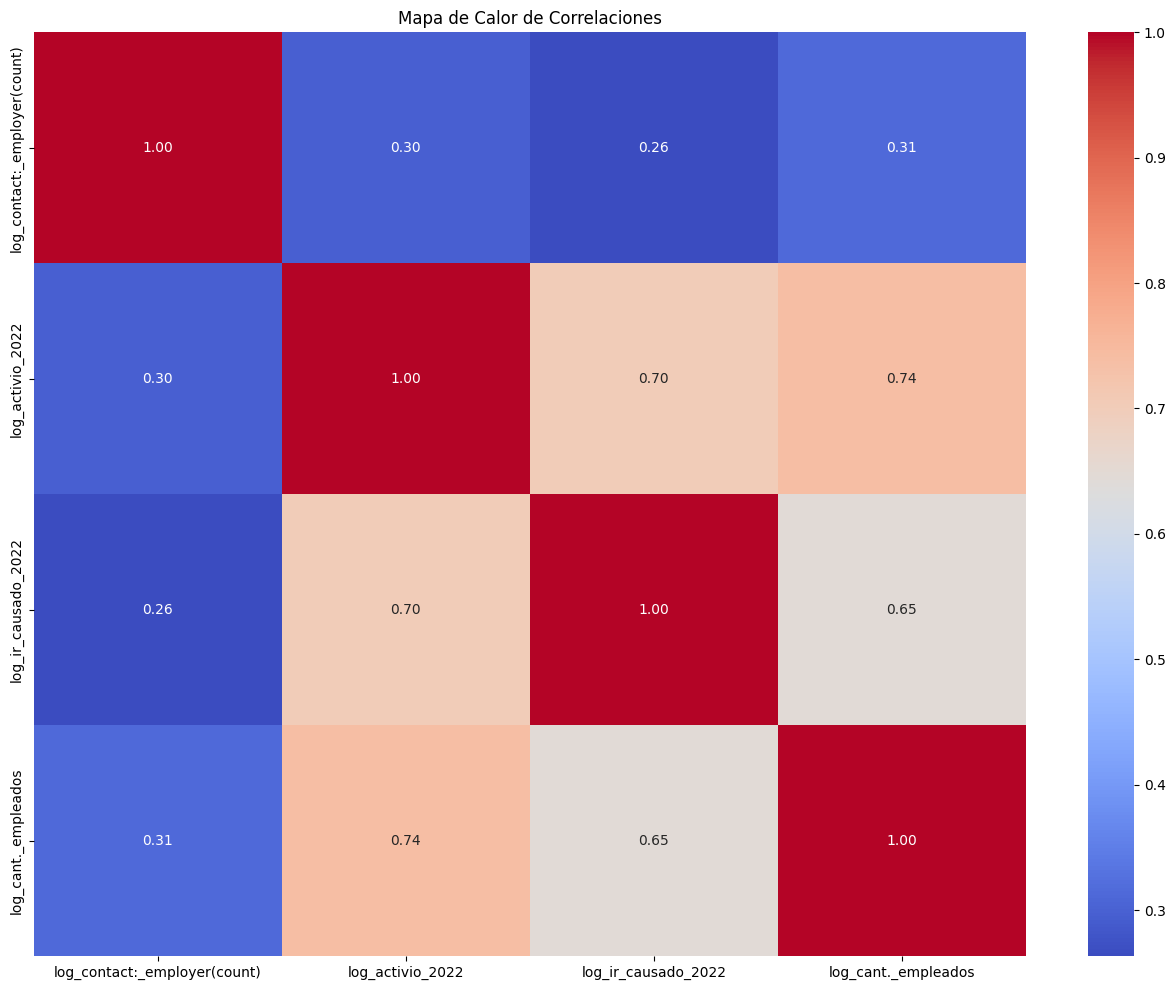

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas para incluir en el mapa de calor
# Incluye tanto las columnas originales como las transformadas
columns_for_heatmap = [f'log_{col}' for col in numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df1[columns_for_heatmap].corr()

# Crear el mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### Modelo de cluster

In [ ]:
print(df1.columns.tolist())

['contact:_employer(count)', 'ruc', 'fecha_constitucion', 'país', 'región', 'representante', 'cargo', 'capital_suscrito', 'ciiu_nivel_1', 'posición', 'año', 'pocisión_', 'año.1', 'tipo_compañía', 'actividad_económica', 'tamaño', 'sector', 'cant._empleados', 'activio_2022', 'patrimonio_2022', 'ingreso_por_ventas_2022', 'utilidad_antes_del_impuesto_2022', 'utilidad_del_ejercicio_2022', 'utilidad_neta_2022', 'ir_causado_2022', 'ingreso_total_2022', 'año_constitucion', 'mes_constitucion', 'dia_constitucion', 'cambio_posicion', 'log_contact:_employer(count)', 'log_activio_2022', 'log_ir_causado_2022', 'log_cant._empleados']


In [ ]:
# Lista de las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['log_contact:_employer(count)',
 'log_activio_2022',
 'log_ir_causado_2022',
 'log_cant._empleados', 'cambio_posicion','ciiu_nivel_1', 'tamaño']

cluster_df = df1[columnas_seleccionadas].copy()

In [ ]:
cluster_df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   log_contact:_employer(count)  1907 non-null   float64
 1   log_activio_2022              1907 non-null   float64
 2   log_ir_causado_2022           1907 non-null   float64
 3   log_cant._empleados           1907 non-null   float64
 4   cambio_posicion               1907 non-null   object 
 5   ciiu_nivel_1                  1907 non-null   object 
 6   tamaño                        1907 non-null   object 
dtypes: float64(4), object(3)
memory usage: 104.4+ KB


In [ ]:
#Codificacion de mis varriables categoricas

clustervf = pd.get_dummies(cluster_df, columns=['cambio_posicion', 'ciiu_nivel_1', 'tamaño'])

#### Cluster K-Means

In [ ]:
# Decidir el número de clusters (k)
k = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=k, random_state=0).fit(clustervf)

# Añadir la asignación de clusters al DataFrame original
df1['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


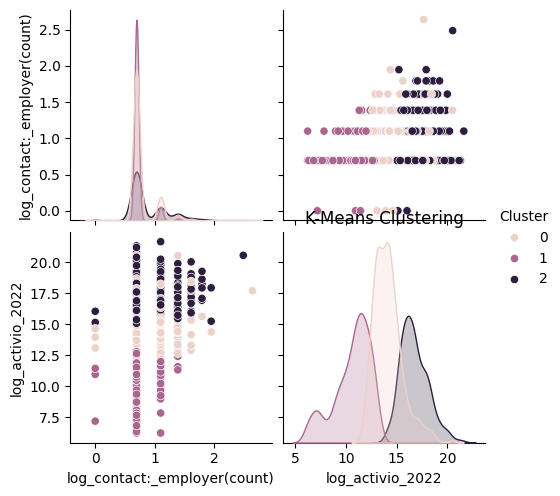

In [ ]:
# Visualización (usando solo variables numéricas originales para el gráfico)
sns.pairplot(df1, hue='Cluster', vars=['log_contact:_employer(count)', 'log_activio_2022'])
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(clustervf)

# Ejecutar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Añadir los clusters al DataFrame
df1['Cluster_DBSCAN'] = clusters

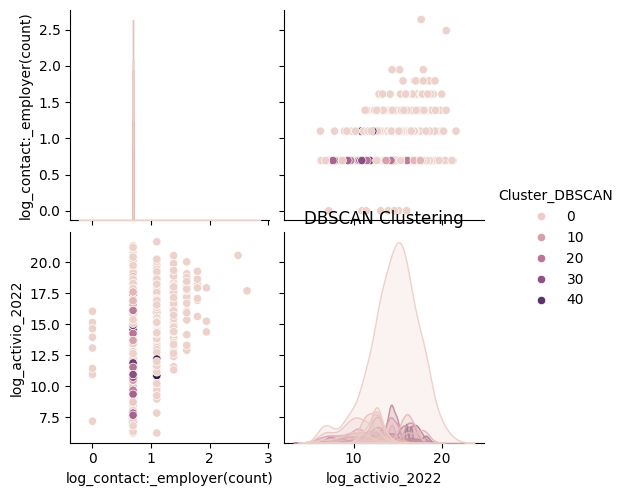

In [ ]:
sns.pairplot(df1, hue='Cluster_DBSCAN', vars=['log_contact:_employer(count)', 'log_activio_2022'])
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
df1.head(5)

,contact:_employer(count),ruc,fecha_constitucion,país,región,representante,cargo,capital_suscrito,ciiu_nivel_1,posición,...,año_constitucion,mes_constitucion,dia_constitucion,cambio_posicion,log_contact:_employer(count),log_activio_2022,log_ir_causado_2022,log_cant._empleados,Cluster,Cluster_DBSCAN
0,1,1793094260001,2020-10-21,ECUADOR,SIERRA,ANDRE JARAMILLO RAMON PATRICIO,APODERADO ESPECIAL,"16.000,00",H,1159,...,2020,10,21,Subio,0.693147,16.884728,6.214608,5.176150,0,-1
1,1,1792206979001,2009-04-08,ECUADOR,SIERRA,GALLEGOS VALDIVIEZO GRYSKA VALERIA,GERENTE GENERAL,"2.000.000,00",K,1261,...,2009,4,8,Bajo,0.693147,16.796294,10.838151,4.969813,2,-1
2,1,1793137377001,2021-04-19,ECUADOR,SIERRA,GUAITA TOAPANTA NORMA ISABEL,PRESIDENTE,"3.000,00",Q,51031,...,2021,4,19,Bajo,0.693147,10.536771,6.912056,2.639057,1,-1
3,2,1790017478001,1965-10-15,ECUADOR,COSTA,MAINGON CORREA FREDDY ANTONIO,APODERADO ESPECIAL,"295.863,40",G,1208,...,1965,10,15,Bajo,1.098612,16.839891,14.705718,4.382027,2,-1
4,1,1792465834001,2013-10-16,ECUADOR,SIERRA,ERAZO CIFUENTES XAVIER ERNESTO,GERENTE GENERAL,"1.000,00",M,23761,...,2013,10,16,Subio,0.693147,12.670430,9.370056,2.944439,0,0


#### Comparacion de modelos


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Para K-Means o cualquier otro método basado en K-Means
score_kmeans = silhouette_score(clustervf, kmeans.labels_)

# Para DBSCAN o métodos similares
score_dbscan = silhouette_score(clustervf, clusters)

# Comparar los scores
print("Silhouette Score K-Means:", score_kmeans)
print("Silhouette Score DBSCAN:", score_dbscan)

Silhouette Score K-Means: 0.3133330604806966
Silhouette Score DBSCAN: -0.28797035096785567


In [ ]:
from sklearn.metrics import calinski_harabasz_score

score_kmeans_ch = calinski_harabasz_score(clustervf, kmeans.labels_)
score_dbscan_ch = calinski_harabasz_score(clustervf, clusters)

print("Calinski-Harabasz Score K-Means:", score_kmeans_ch)
print("Calinski-Harabasz Score DBSCAN:", score_dbscan_ch)

Calinski-Harabasz Score K-Means: 1714.6665302382223
Calinski-Harabasz Score DBSCAN: 24.615329787005933
